TypeError: Image data of dtype object cannot be converted to float

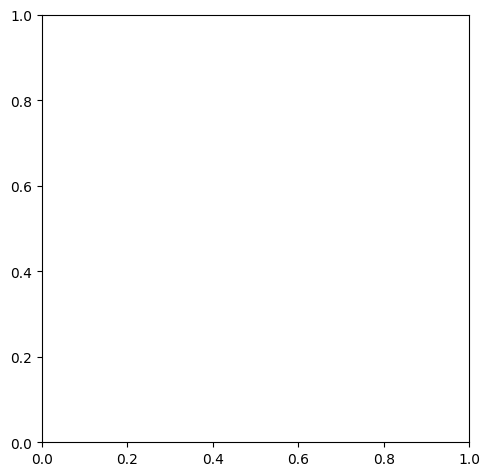

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5))

img_c1 = cv2.imread("left01.jpg")
plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
img_c2 = np.fft.fft2(img_c1) #2D fast fourier transform
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
phase = np.angle(img_c2)
magnitude = np.abs(img_c2)



# plt.subplot(152), plt.imshow(img_c2, "gray"), plt.title("Processed Image")
# img_c3 = np.fft.fftshift(img_c2)
# img_c4 = np.fft.ifftshift(img_c3)
# img_c5 = np.fft.ifft2(img_c4)

# plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
# plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")


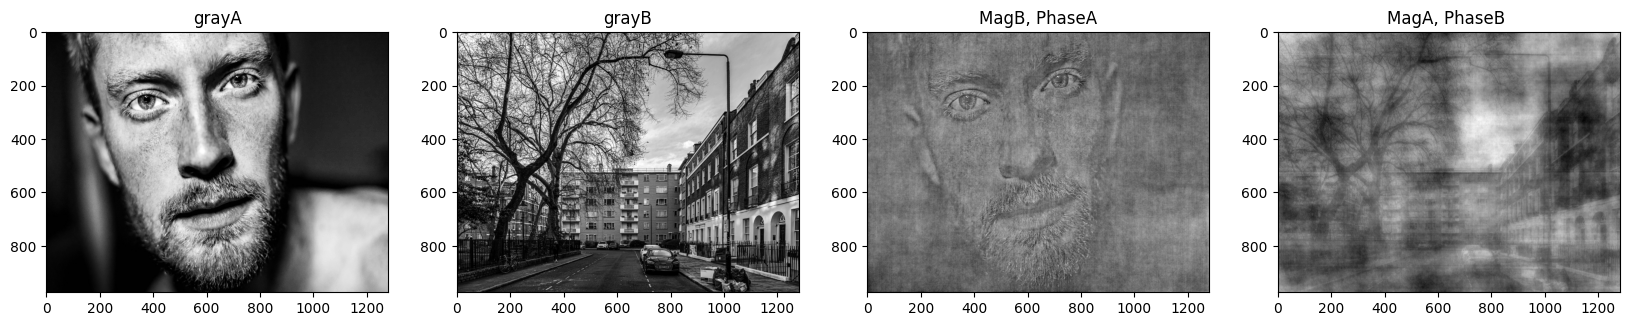

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

grayA = cv2.imread("grayA3.jpeg", 0)

grayB = cv2.imread("grayA4.jpeg", 0)

grayA = cv2.resize(grayA, dsize = [grayB.shape[1], grayB.shape[0]])

plt.figure(figsize=(6.4*4, 4.8*4))


f = np.fft.fft2(grayA)
f2 = np.fft.fft2(grayB)

phase_f = np.exp(1j*np.angle(f))
mag_f = np.abs(f)

mag_f2 = np.abs(f2)
phase_f2 = np.exp(1j*np.angle(f2))
# fshift1 = np.fft.fftshift(f)
# phase_spectrumA = np.angle(fshift1)
# magnitude_spectrumA = 20*np.log(np.abs(fshift1))
plt.subplot(151), plt.imshow(grayA, cmap = "gray"), plt.title("grayA")
plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")


# fshift2 = np.fft.fftshift(f2)
# phase_spectrumB = np.angle(fshift2)
# magnitude_spectrumB = 20*np.log(np.abs(fshift2))

combined1 = np.multiply(mag_f2, phase_f)
imgCombined1 = np.real(np.fft.ifft2(combined1))
plt.subplot(153), plt.imshow(imgCombined1, cmap ="gray"), plt.title("MagB, PhaseA")

combined2 = np.multiply(mag_f, phase_f2)
imgCombined2 = np.real(np.fft.ifft2(combined2))
plt.subplot(154), plt.imshow(imgCombined2, cmap="gray"), plt.title("MagA, PhaseB ")


# imgCombined = np.abs(imgCombined)

# plt.imshow(imgCombined, cmap='gray')
plt.show()

In [ ]:
print(grayA.shape)
print(grayB.shape)

NameError: name 'grayA' is not defined

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path, second_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale
    second_image = cv2.imread(second_image_path, 0) #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])
    second_image = cv2.resize(second_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_phase = magnitude_phase(first_image)
    second_image_magnitude, second_image_phase = magnitude_phase(second_image)

    return first_image_magnitude, first_image_phase, second_image_magnitude, second_image_phase


def magnitude_phase(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    phase = np.exp(1j*np.angle(image_fourier))
    
    return magnitude, phase
    
def construct_image(magnitude, phase):

    combined = np.multiply(magnitude, phase)
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))

    return image_combined


(<AxesSubplot: title={'center': 'MagZeyad, PhaseAnwar'}>,
 Text(0.5, 1.0, 'MagZeyad, PhaseAnwar'))

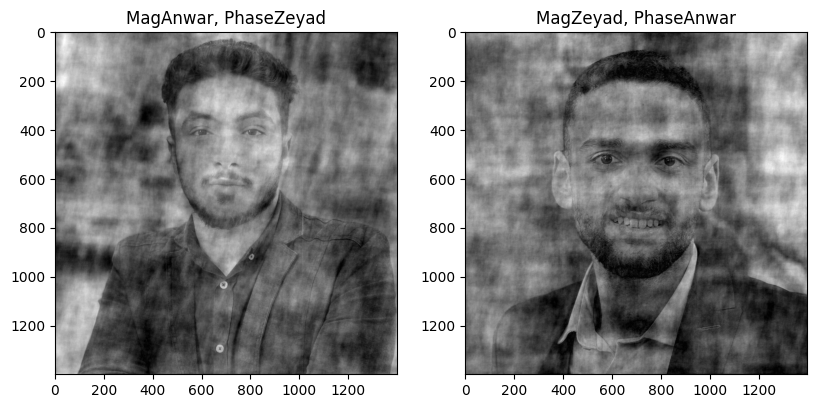

In [18]:
plt.figure(figsize=(6.4*4, 4.8*4))

grayA = "anwar.jpeg"

grayB = "zeyad.jpeg"



first_mag, first_phase, second_mag, second_phase = fourier_2D (grayA, grayB)

image_fm_sp = construct_image(first_mag, second_phase)
image_sm_fp = construct_image(second_mag, first_phase)

# plt.subplot(151), plt.imshow(grayA, cmap ="gray"), plt.title("grayA")
# plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")
plt.subplot(153), plt.imshow(image_fm_sp, cmap ="gray"), plt.title("MagAnwar, PhaseZeyad")
plt.subplot(154), plt.imshow(image_sm_fp, cmap ="gray"), plt.title("MagZeyad, PhaseAnwar")





(<AxesSubplot: title={'center': 'MagRaouf, PhaseMomen'}>,
 Text(0.5, 1.0, 'MagRaouf, PhaseMomen'))

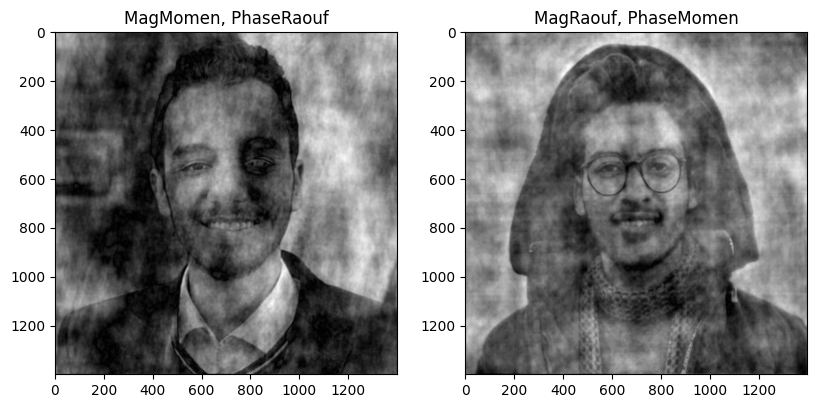

In [19]:
plt.figure(figsize=(6.4*4, 4.8*4))

grayA = "momen.jpeg"

grayB = "raouf.jpeg"



first_mag, first_phase, second_mag, second_phase = fourier_2D (grayA, grayB)

image_fm_sp = construct_image(first_mag, second_phase)
image_sm_fp = construct_image(second_mag, first_phase)

# plt.subplot(151), plt.imshow(grayA, cmap ="gray"), plt.title("grayA")
# plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")
plt.subplot(153), plt.imshow(image_fm_sp, cmap ="gray"), plt.title("MagMomen, PhaseRaouf")
plt.subplot(154), plt.imshow(image_sm_fp, cmap ="gray"), plt.title("MagRaouf, PhaseMomen")

(<AxesSubplot: title={'center': 'MagSaad, PhaseMazen'}>,
 Text(0.5, 1.0, 'MagSaad, PhaseMazen'))

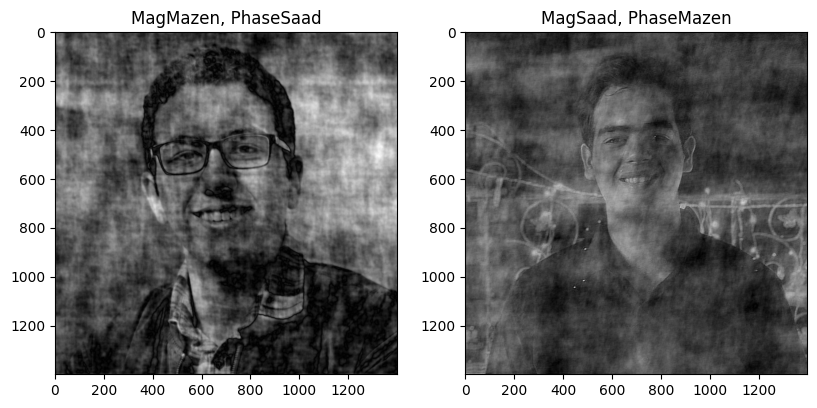

In [20]:
plt.figure(figsize=(6.4*4, 4.8*4))

grayA = "mazen.jpeg"

grayB = "saad.jpeg"



first_mag, first_phase, second_mag, second_phase = fourier_2D (grayA, grayB)

image_fm_sp = construct_image(first_mag, second_phase)
image_sm_fp = construct_image(second_mag, first_phase)

# plt.subplot(151), plt.imshow(grayA, cmap ="gray"), plt.title("grayA")
# plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")
plt.subplot(153), plt.imshow(image_fm_sp, cmap ="gray"), plt.title("MagMazen, PhaseSaad")
plt.subplot(154), plt.imshow(image_sm_fp, cmap ="gray"), plt.title("MagSaad, PhaseMazen")